In [1]:
! pip install pandas
! pip install networkx
! pip install matplotlib
! pip install scipy

You should consider upgrading via the 'c:\users\louis\cloudstation\formations\unibe\03 - s2024\1. social media analytics\bixi\.venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\louis\cloudstation\formations\unibe\03 - s2024\1. social media analytics\bixi\.venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\louis\cloudstation\formations\unibe\03 - s2024\1. social media analytics\bixi\.venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\louis\cloudstation\formations\unibe\03 - s2024\1. social media analytics\bixi\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import random
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('./data/2023.csv')

#data = data.dropna() 

data.head(10)

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
0,Métro Mont-Royal (Utilités publiques / Rivard),Le Plateau-Mont-Royal,45.524236,-73.581552,Chabot / Mont-Royal,Le Plateau-Mont-Royal,45.534134,-73.573524,1698266696468,1.698267e+12
1,Rielle / Wellington,Verdun,45.460156,-73.567001,St-Jacques / McGill,Ville-Marie,45.501441,-73.560144,1698270535502,1.698272e+12
2,Ste-Catherine / Drummond,Ville-Marie,45.498588,-73.574278,Peel / Ottawa,Le Sud-Ouest,45.494200,-73.559985,1698285705974,1.698286e+12
3,Boyer / du Mont-Royal,Le Plateau-Mont-Royal,45.527432,-73.579917,de l'Hôtel-de-Ville / Rachel,Le Plateau-Mont-Royal,45.519897,-73.580106,1698269489932,1.698270e+12
4,Clark / Ontario,Ville-Marie,45.510625,-73.566903,Wolfe / Robin,Ville-Marie,45.519581,-73.560116,1698270006571,1.698270e+12
5,Bourget / St-Jacques,Le Sud-Ouest,45.480846,-73.583862,Métro Lionel-Groulx (St-Jacques / Atwater),Le Sud-Ouest,45.483629,-73.579703,1698274953294,1.698275e+12
6,St-Antoine / de la Montagne,Ville-Marie,45.495372,-73.568589,Ste-Catherine / St-Mathieu,Ville-Marie,45.493833,-73.579142,1698292627511,1.698293e+12
7,de Maisonneuve / Greene,Westmount,45.486971,-73.589293,Métro Atwater (Atwater / Ste-Catherine),Ville-Marie,45.489476,-73.584566,1698268339505,1.698269e+12
8,Marie-Anne / St-Hubert,Le Plateau-Mont-Royal,45.524683,-73.578897,Marie-Anne / Papineau,Le Plateau-Mont-Royal,45.531774,-73.572446,1698279430752,1.698280e+12
9,Ste-Catherine / St-Laurent,Ville-Marie,45.509813,-73.563895,St-André / Ste-Catherine,Ville-Marie,45.516427,-73.558112,1698277591355,1.698278e+12


In [4]:
G = nx.from_pandas_edgelist(data, 'STARTSTATIONNAME', 'ENDSTATIONNAME')

nx.write_graphml(G, "2023.graphml")

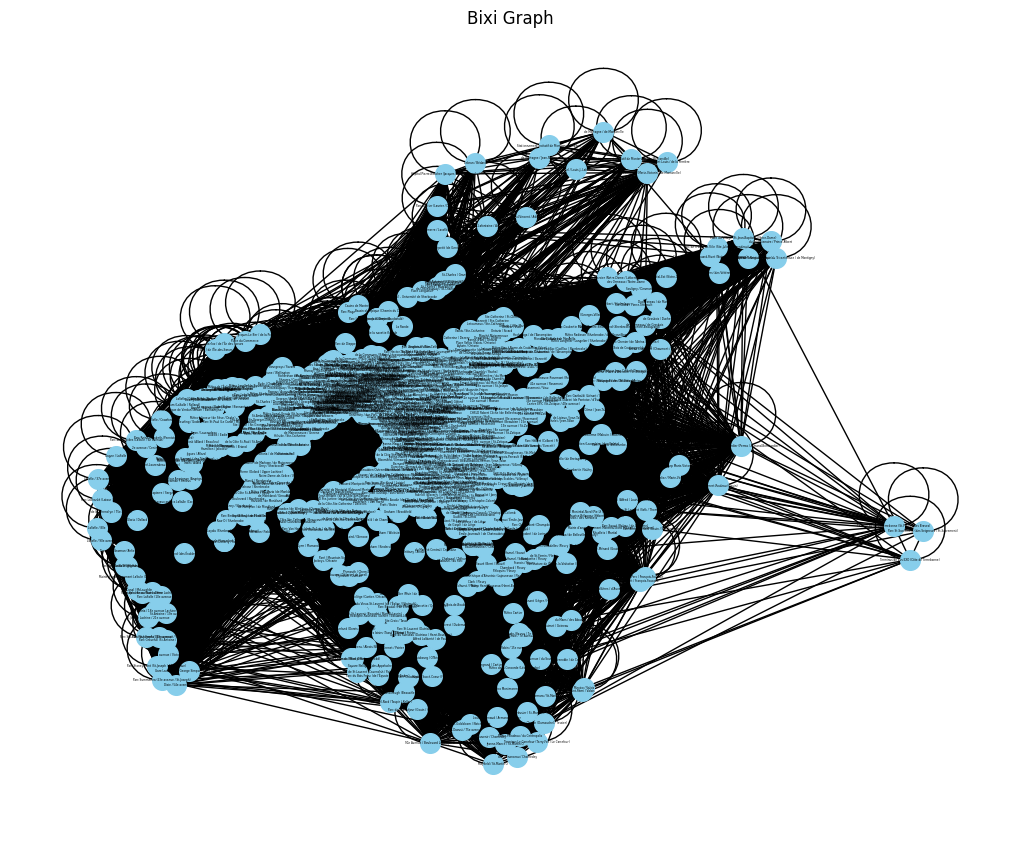

In [59]:


unique_positions_df = data[['STARTSTATIONNAME' , 'STARTSTATIONLATITUDE', 'STARTSTATIONLONGITUDE']].drop_duplicates()
# unique_positions_end = data[['ENDSTATIONNAME' , 'ENDSTATIONLATITUDE', 'ENDSTATIONLONGITUDE']].drop_duplicates()
# unique_positions_df = pd.concat([unique_positions_start, unique_positions_end], ignore_index=True).drop_duplicates()


node_positions = {}
nodes_to_remove = []
for node in G.nodes():
    node_data = unique_positions_df.loc[unique_positions_df['STARTSTATIONNAME'] == node]
    if not node_data.empty:
        latitude = node_data.iloc[0]['STARTSTATIONLATITUDE']
        longitude = node_data.iloc[0]['STARTSTATIONLONGITUDE']
        if node == "Smith / Peel": # the coordinate of Smith / Peel is -1/-1 ...
            latitude = 45.500414
            longitude = -73.57371
        node_positions[node] = (latitude, longitude)
    else:
        # handle the case when no coordinate for the node is not found
        nodes_to_remove.append(node)
    
for node in nodes_to_remove:
    G.remove_node(node)

plt.figure(figsize=(10, 8))

nx.draw(G, pos=node_positions, with_labels=True, node_color='skyblue', node_size=200, edge_color='black', linewidths=1, font_size=2)
plt.title('Bixi Graph')
plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_16852\3700293105.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes(), num_nodes_to_visualize)


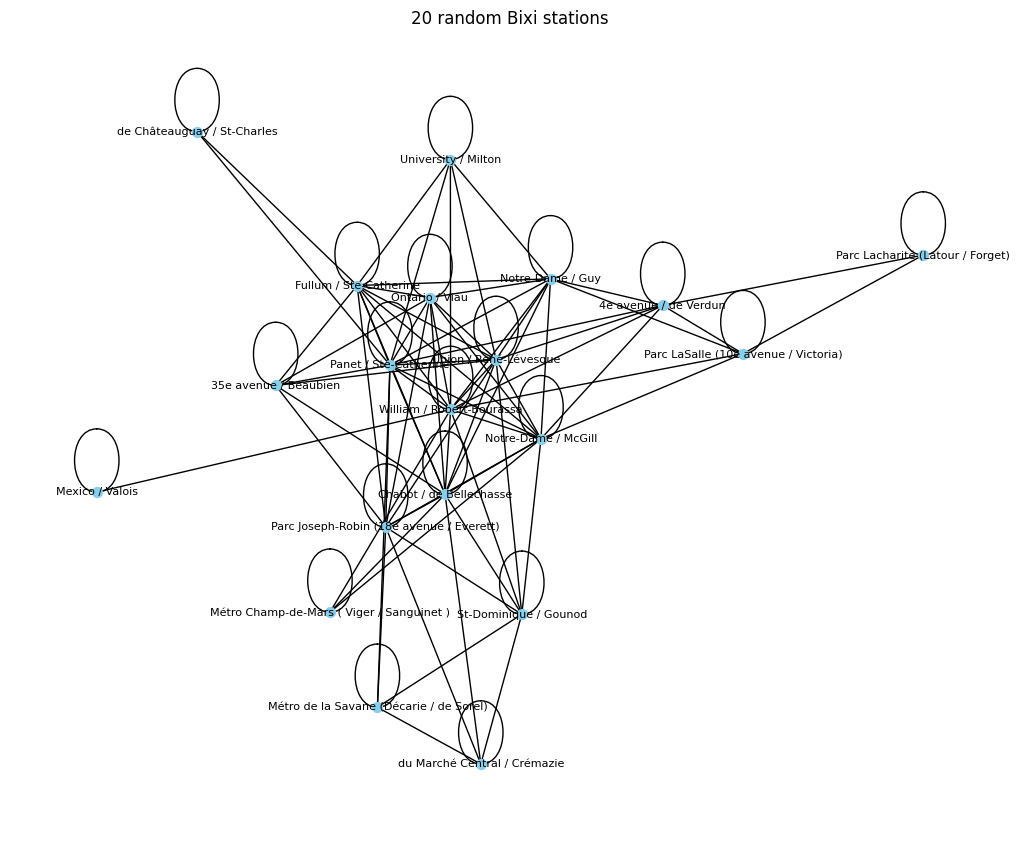

In [60]:
num_nodes_to_visualize = 20
random_nodes = random.sample(G.nodes(), num_nodes_to_visualize)
subgraph = G.subgraph(random_nodes)

# Step 4: Draw the subgraph
plt.figure(figsize=(10, 8))
nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=50, edge_color='black', linewidths=1, font_size=8)
plt.title(f'{num_nodes_to_visualize} random Bixi stations')
plt.show()